# Churn Predictor: Forecasting Customer Churn with Machine Learning

# Business Understanding

## Project Scenario
Every company wants to increase its profit or revenue margin and customer retention is one key area industry players focus their resources. In today's world of machine learning, most companies build classification models to perform churn analysis on their customers. 

### Overview
The purpose of this project is to develop a machine learning model for binary classification. The model will predict whether a given instance belongs to one of two classes based on a set of input features.

### Background
Vodafone, a telecommunication company want to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be applied to avert this problem.

### Project Ojectives
- Develop and train a machine learning model using historical data to predict whether a customer will churn or not.
- Evaluate the model's performance using appropriate metrics : accuracy,precision,recall,f1-score.
- Fine-tune the model parameters with GridSearchCv to optimize performance.
- Perform hypothesis testing to reject or fail to reject the null hypothesis


### Data for the project
The data for this projects has been divided into 3. The first 2 data sets are for training and evaluation the machine learning model  while the last data set is for testing the model.

### Data Dictionary

| Feature           | Description                                                | Data Type|
|-------------------|------------------------------------------------------------|-----------| 
| Gender            | Whether the customer is a male or a female                 |Object|
| SeniorCitizen     | Whether a customer is a senior citizen or not              |Object|
| Partner           | Whether the customer has a partner or not (Yes, No)        |Object|
| Dependents        | Whether the customer has dependents or not (Yes, No)       |Object|
| Tenure            | Number of months the customer has stayed with the company |Int|
| Phone Service     | Whether the customer has a phone service or not (Yes, No)  |Object|
| MultipleLines     | Whether the customer has multiple lines or not            |Object|
| InternetService   | Customer's internet service provider (DSL, Fiber Optic, No)|Object|
| OnlineSecurity    | Whether the customer has online security or not (Yes, No, No Internet)|Object|
| OnlineBackup      | Whether the customer has online backup or not (Yes, No, No Internet)|Object|
| DeviceProtection  | Whether the customer has device protection or not (Yes, No, No internet service)|Object|
| TechSupport       | Whether the customer has tech support or not (Yes, No, No internet)|Object|
| StreamingTV       | Whether the customer has streaming TV or not (Yes, No, No internet service)|Object|
| StreamingMovies   | Whether the customer has streaming movies or not (Yes, No, No Internet service)|Object|
| Contract          | The contract term of the customer (Month-to-Month, One year, Two year)|Object|
| PaperlessBilling  | Whether the customer has paperless billing or not (Yes, No)|Object|
| Payment Method    | The customer's payment method (Electronic check, Mailed check, Bank transfer(automatic), Credit card(automatic))|Object|
| MonthlyCharges    | The amount charged to the customer monthly| Float|
| TotalCharges      | The total amount charged to the customer|Float|                   
| Churn             | Whether the customer churned or not (Yes or No), **target variable**          |Object|


### Business Sucess Criteria
- Model accuracy: The model's accuracy should be above 70%
- Retention Strategy Effectiveness: The implemented retention strategies should show a measurable impact on reducing customer churn rates. This can be assessed by comparing churn rates before and after implementing the strategies.
- Cost Reduction: The model should contribute to reducing the costs associated with customer acquisition by identifying at-risk customers early on and allowing targeted retention efforts.
- Customer Satisfaction: While focusing on retention, the model and strategies should also aim to maintain or improve customer satisfaction levels. High customer satisfaction leads to increased loyalty and potentially higher customer lifetime value.
- Adaptability and Scalability: The developed model should be adaptable to changing business environments and scalable to accommodate larger datasets or additional features. This ensures its long-term viability and usefulness for the company.
- Feedback and Iteration: Continuous feedback loops should be established to gather insights from the model's predictions and refine the retention strategies accordingly. This iterative process ensures ongoing improvement and optimization of the churn prediction system.

### Future Work
Deploy the model to be used in the company's mobile/web application


## Hypothesis Statement
- **Null Hypothesis (Ho)**: There is no significant relationship between the amount of monthly customer charges and customer churn.

- **Alternative Hypothesis (Ha)**: There is a statistically significant relationship between the amount of monthly customer charges and customer churn.

## Business Questions
1. What is the rate of churn by gender?
2. How do different levels of monthly customer charges impact churn rates?
3. Do customers who pay more monthly charges tend to stay longer? 
4. What is the prefered service [Streaming movies, streaming TV] gender?
5. What impact does the prefered service has on customer churn?
6. Are customers on long-term contracts less likely to churn?
7. How does does the relationship between monthly charges and churn differ based on contract duration?
8. What impact does the ISPs have on customer churn?
9. Which Internet Service Provider accounts for the most charges?
10. What is the effect of method of payment on customer churn?


## Data Understanding 

### Library Importation

In [1]:
# data manipulation tools
import pandas as pd
import numpy as np
import missingno as msno
# data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# statistics librabry
from scipy import stats
import statistics as  stat

# database connections
import pyodbc
from dotenv import load_dotenv,dotenv_values

# machine learning libraries
import sklearn
from sklearn.impute import SimpleImputer

# hide warnings
import warnings
warnings.filterwarnings("ignore")


## Data Loading

### Set up database connection

In [2]:
# load environment variables
environment_variables = dotenv_values("../.env")

# load database configurations
database = environment_variables.get("DB_DATABASENAME")
username = environment_variables.get("DB_USERNAME")
password = environment_variables.get("DB_PASSWORD")
server_name = environment_variables.get("DB_SERVERNAME")



# define connection string
connection_string = f"DRIVER={{SQL SERVER}};SERVER={server_name};DATABASE={database};UID={username};PWD={password}"

In [3]:
# setup connection
connector = pyodbc.connect(connection_string)

In [4]:
# query the database
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"
df_1 = pd.read_sql(query,connector)

In [5]:
# load first five rows
df_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [6]:
# check for column names
df_1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# loading the excel dataset 
df_2 = pd.read_csv("../data/LP2_Telco-churn-second-2000.csv")
df_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [8]:
# check for the column names of the second dataset
df_2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Concatenate DataFrames 

In [9]:
# concatenate data
train_df = pd.concat([df_1,df_2],ignore_index=True)


## Exploratory Data Analysis

In [10]:
# check the first five rows
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [11]:
# view the last five rows
train_df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
5042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [13]:
# check the shape of the dataset
train_df.shape

(5043, 21)

It can be seen from the shape that the training dataset have 5043 rows and 21 columns

In [12]:
# information about the dataset
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


## Information About The Data 
- There are null values present in the following columns: MultipleLines, Online Security, OnlineBackup, DeviceProtection  ,TechSupport ,StreamingTV , StreamingMovies, Total Charges and Churn which will be looked at and the appropriate action to be taken on
- The total charges column has an object data type which is supposed to be a numerical data type

## Course of Action
- Analyze the Null values in the individual columns to decide to drop or fill them where necessary
- Convert Data Type of Total Charges to  Float


In [13]:
# Checking for duplicates 
train_df.duplicated().sum()


0

#### Check for Unique Values

In [14]:
# Checking for nunique
train_df.nunique()

customerID          5043
gender                 2
SeniorCitizen          2
Partner                4
Dependents             4
tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4884
Churn                  4
dtype: int64

In [15]:
# Define a function to check for the number of unique values in categorical columns
def check_unique_values(df):
    """
    Check the number of unique values in the categorical columns in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        None
    """
    print("Checking unique values in categorical columns:")

    # Iterate through each column
    for col in train_df.columns:
        # Check if the column is categorical (object type) and not the 'customerID' column
        if ((train_df[col].dtype == 'object') or (train_df[col].dtype == 'bool')) and (col != 'customerID'):
            # Print the column name and its unique values
            print(col, '---->', train_df[col].unique())

In [18]:
# Call the function to check unique values for the dataFrame
check_unique_values(train_df)

Checking unique values in categorical columns:
gender ----> ['Female' 'Male']
Partner ----> [True False 'No' 'Yes']
Dependents ----> [False True 'No' 'Yes']
PhoneService ----> [False True 'Yes' 'No']
MultipleLines ----> [None False True 'No' 'No phone service' 'Yes']
InternetService ----> ['DSL' 'Fiber optic' 'No']
OnlineSecurity ----> [False True None 'No' 'Yes' 'No internet service']
OnlineBackup ----> [True False None 'No' 'Yes' 'No internet service']
DeviceProtection ----> [False True None 'No' 'Yes' 'No internet service']
TechSupport ----> [False True None 'Yes' 'No' 'No internet service']
StreamingTV ----> [False True None 'No' 'Yes' 'No internet service']
StreamingMovies ----> [False True None 'No' 'Yes' 'No internet service']
Contract ----> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ----> [True False 'Yes' 'No']
PaymentMethod ----> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ----> [29.850000381469727 188

#### Checking for Null Values

In [16]:
# Checking for missing values 
train_df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [17]:
# Checking for percentage of missing values 
(train_df.isnull().sum()/(len(train_df)))*100

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        5.334127
InternetService      0.000000
OnlineSecurity      12.908983
OnlineBackup        12.908983
DeviceProtection    12.908983
TechSupport         12.908983
StreamingTV         12.908983
StreamingMovies     12.908983
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.099147
Churn                0.019829
dtype: float64

<Axes: >

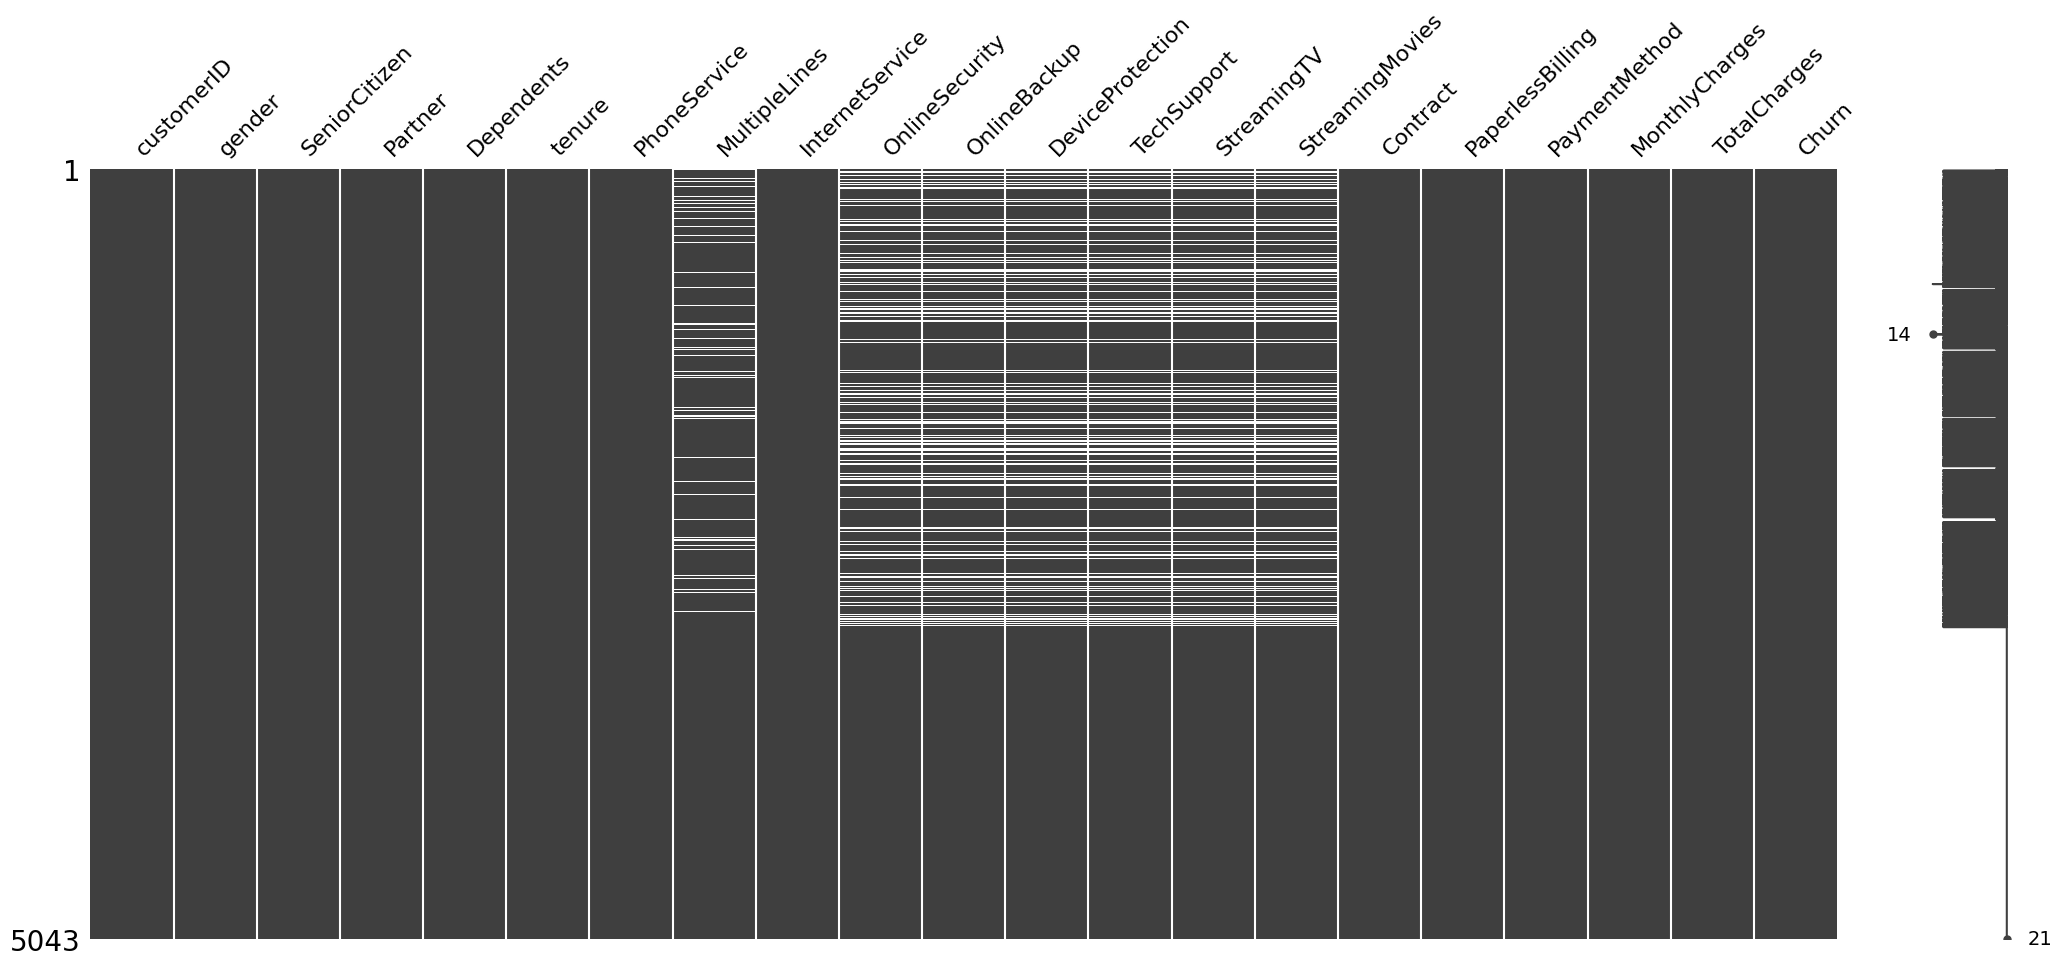

In [18]:
# Visualize missing data pattern using matrix plot
msno.matrix(train_df)

#### Descriptive Analysis On The Dataframe


In [25]:
# calling the describe method on the train_df
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


## Observations On The Data
The following was observed
***SeniorCitizen*** : The mean value of 0.162 suggests that approximately 16.24% of the customers in the dataset are senior citizens.The standard deviation of 0.369 indicates some variability in the distribution of senior citizen status among customers and the minimum value of 0 implies that there are non-senior customers in the dataset.

***Tenure*** : On average, customers stay with the service provider for approximately 32.58 months.The minimum tenure is 0 months, which could indicate newly acquired customers anf the maximum tenure is 72 months, indicating some customers have been with the provider for a significant period.The standard deviation of 24.53 suggests that there is a considerable variation in tenure lengths among customers.

***MonthlyCharges*** : The minimum monthly charge is $18.40, while the maximum is $118.65 and on average, customers are charged approximately $65.09 per month.The standard deviation of 30.07 indicates variability in monthly charges among customers.

***TotalCharges*** : On average, customers have been charged a total of approximately $2302.06 while The minimum total charge is $18.80, while the maximum is $8670.10. The standard deviation of $2269.48 suggests significant variability in total charges among customers.

## Data Quality Issues

#### Univariate Analysis


array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

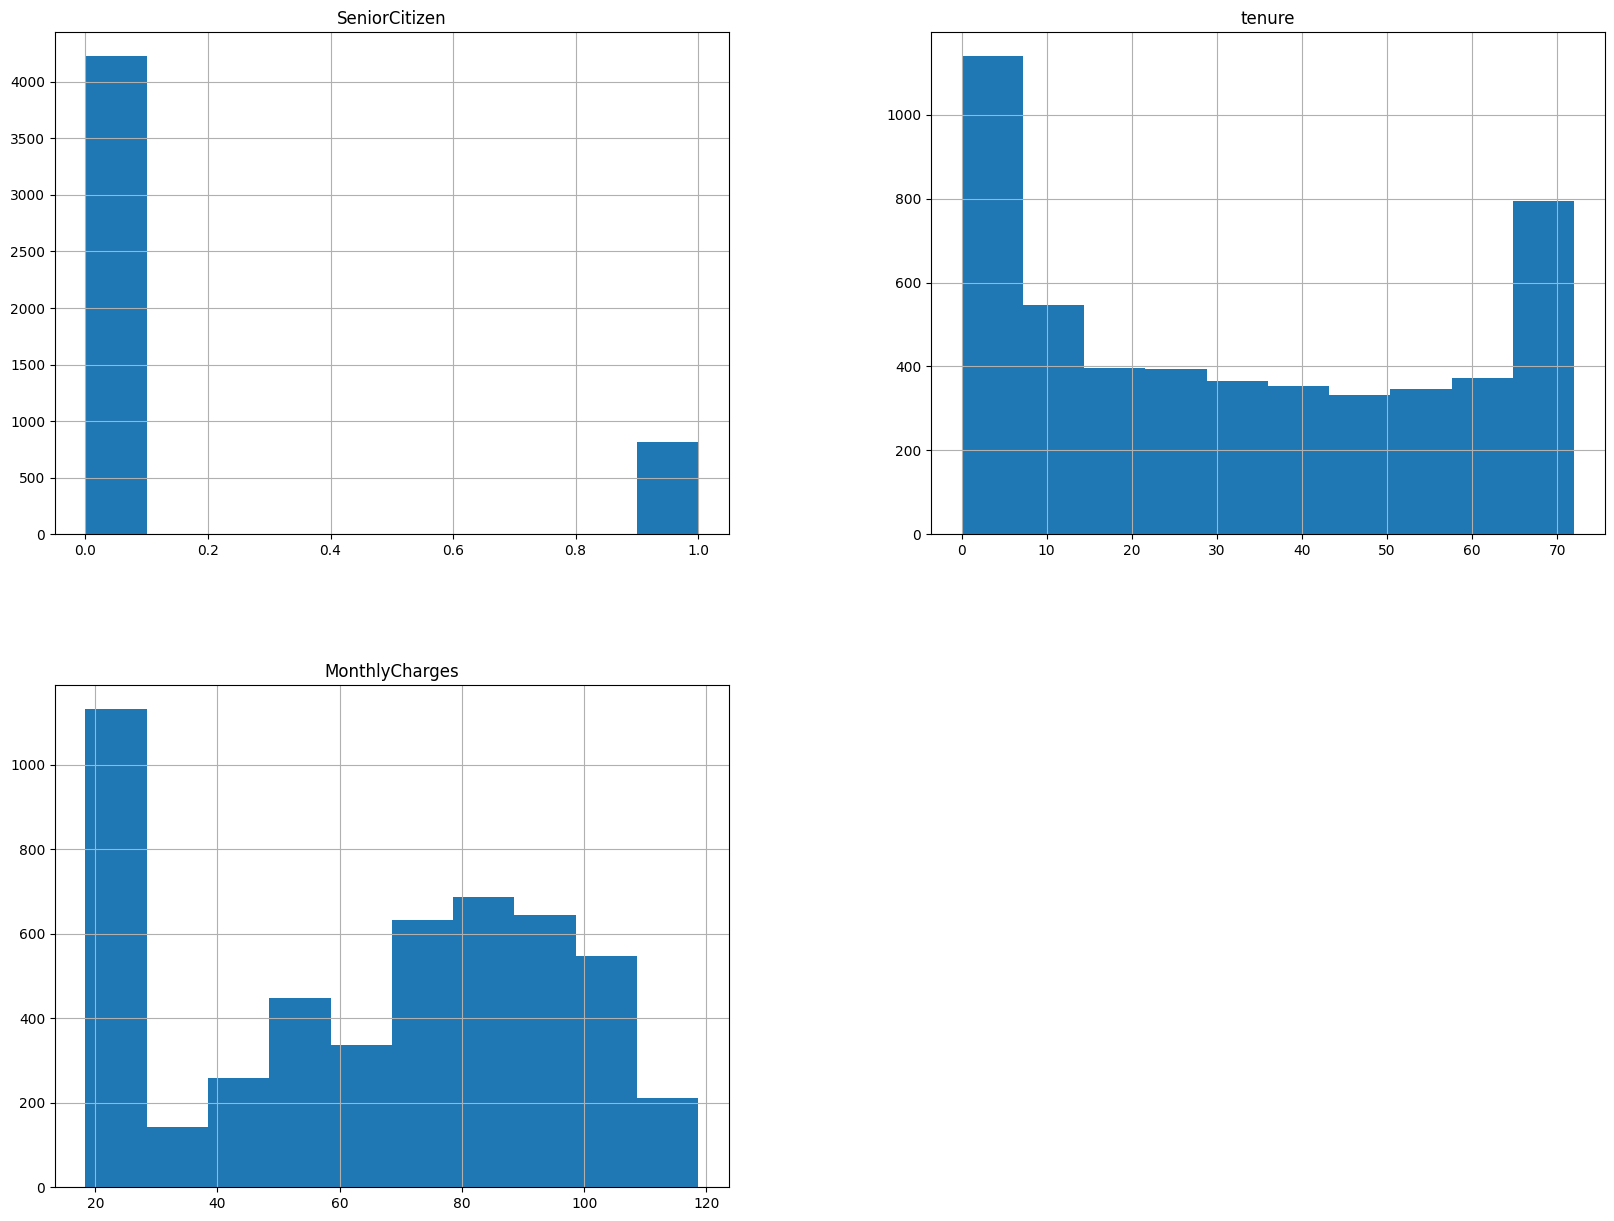

In [20]:
# Visualize the Distribution of the variables
train_df.hist(figsize=(20, 15))

In [ ]:
# Test 

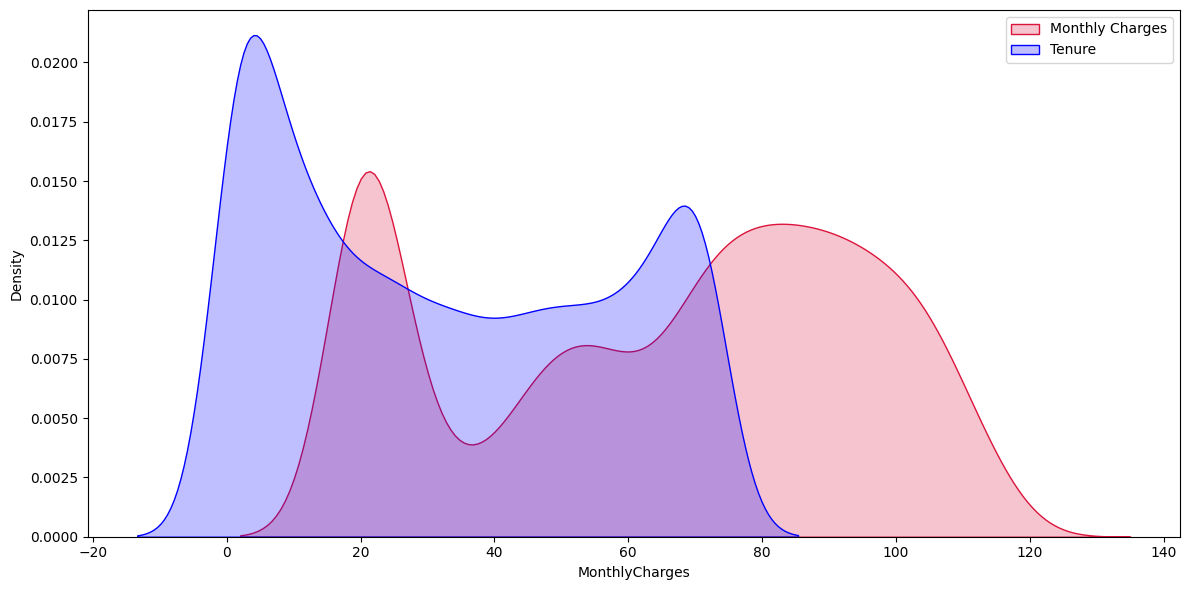

In [34]:
# check for normal distribution with KDE

fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=train_df,x='MonthlyCharges', shade = True,
            color='crimson', label='Monthly Charges', fill=True, ax=ax)
sns.kdeplot(data=train_df,x='tenure', shade = True,
            color='blue', label='Tenure', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

#### Outliers Analysis With Box Plot

<Axes: >

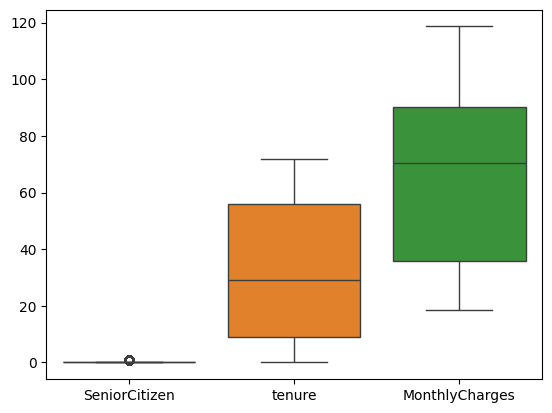

In [26]:
# visuaization with box plot
sns.boxplot(train_df)

There are no outliers in the dataset


<Axes: ylabel='count'>

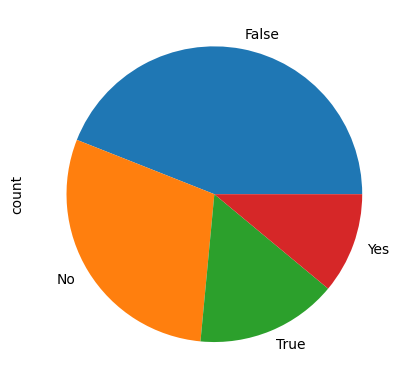

In [26]:
# Ananlyze the Churn column
churn_count = train_df["Churn"].value_counts()
sns.

## Bivariate Analysis

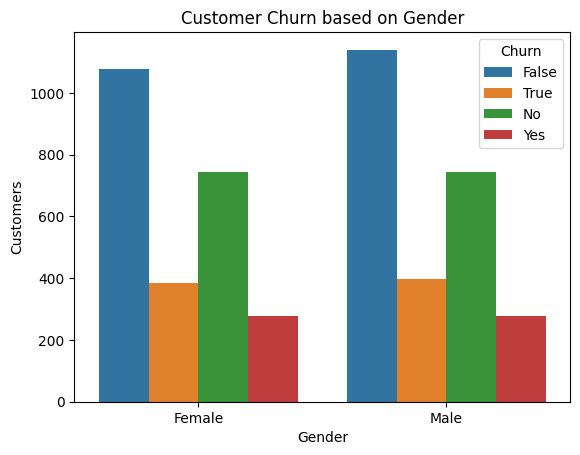

In [27]:
# Relationship beyween Customer Churn and Gender
sns.countplot(data=train_df,x='gender',hue='Churn')
plt.xlabel('Gender')
plt.ylabel('Customers')
plt.title('Customer Churn based on Gender')
plt.show()

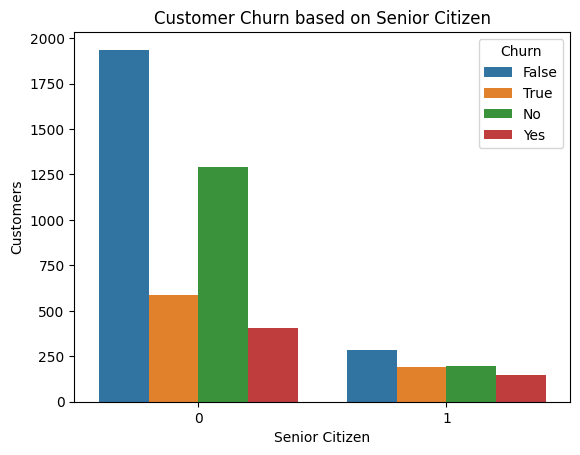

In [28]:
# Relationship between Churn and SeniorCitizen
sns.countplot(data=train_df, x='SeniorCitizen',hue='Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Customers')
plt.title('Customer Churn based on Senior Citizen')
plt.show()

## Observation
From The visualization above, we can see that the churn column consist of 4 categories: True,False,Yes,No

## Course of Action
Convert all the No to False and Yes to True to ensure consistency in the column


## Data Preparation

## Modeling

## Model Evaluation